In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
import pickle

In [2]:
# Load the dataset
df = pd.read_csv('combined_data.csv')


In [3]:
df.sample(5)

,label,text
67303,1,theorize let you enjoy the happiness of the sc...
15767,1,http www imagehost ro viewer php img escapelon...
19046,1,sought to contrive intending to express i do n...
15912,1,notification alert :\nthank you for your inqui...
34269,0,on escapenumber escapenumber escapenumber dave...


In [4]:
df.shape

(83448, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83448 entries, 0 to 83447
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   83448 non-null  int64 
 1   text    83448 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.3+ MB


In [6]:
df.head()

,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...


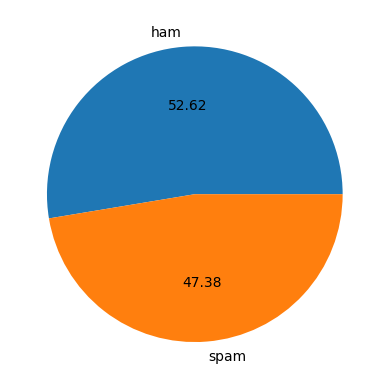

In [7]:
import matplotlib.pyplot as plt
plt.pie(df['label'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [8]:
import nltk

In [9]:
df['num_characters'] = df['text'].apply(len)

In [10]:
df.head()


,label,text,num_characters
0,1,ounce feather bowl hummingbird opec moment ala...,148
1,1,wulvob get your medircations online qnb ikud v...,808
2,0,computer connection from cnn com wednesday es...,2235
3,1,university degree obtain a prosperous future m...,592
4,0,thanks for all your answers guys i know i shou...,1362


In [11]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [12]:
df.head()

,label,text,num_characters,num_words
0,1,ounce feather bowl hummingbird opec moment ala...,148,20
1,1,wulvob get your medircations online qnb ikud v...,808,104
2,0,computer connection from cnn com wednesday es...,2235,338
3,1,university degree obtain a prosperous future m...,592,76
4,0,thanks for all your answers guys i know i shou...,1362,223


In [13]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [14]:

df.head()

,label,text,num_characters,num_words,num_sentences
0,1,ounce feather bowl hummingbird opec moment ala...,148,20,1
1,1,wulvob get your medircations online qnb ikud v...,808,104,1
2,0,computer connection from cnn com wednesday es...,2235,338,1
3,1,university degree obtain a prosperous future m...,592,76,1
4,0,thanks for all your answers guys i know i shou...,1362,223,1


In [15]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,83448.000000,83448.000000,83448.000000
mean,1662.952725,285.022733,7.250060
std,4178.578068,727.032941,34.832317
min,1.000000,1.000000,1.000000
25%,449.000000,80.000000,1.000000
50%,879.000000,154.000000,1.000000
75%,1861.000000,314.000000,5.000000
max,598705.000000,101984.000000,3093.000000


In [17]:
# ham
df[df['label'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,39538.000000,39538.000000,39538.000000
mean,2121.693814,367.659467,8.137362
std,5666.075286,986.766959,42.112956
min,1.000000,1.000000,1.000000
25%,579.000000,107.000000,1.000000
50%,1139.000000,202.000000,1.000000
75%,2174.000000,381.000000,6.000000
max,598705.000000,101984.000000,2827.000000


In [18]:
#spam
df[df['label'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,43910.000000,43910.000000,43910.000000
mean,1249.887247,210.613915,6.451105
std,1978.631507,340.723605,26.599623
min,1.000000,1.000000,1.000000
25%,360.000000,62.000000,1.000000
50%,704.000000,122.000000,1.000000
75%,1510.000000,250.000000,5.000000
max,144087.000000,25444.000000,3093.000000


In [19]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

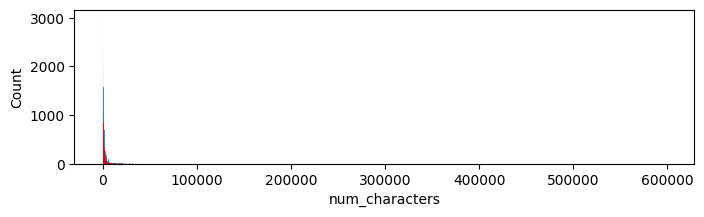

In [23]:
plt.figure(figsize=(8,2))
sns.histplot(df[df['label'] == 0]['num_characters'])
sns.histplot(df[df['label'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

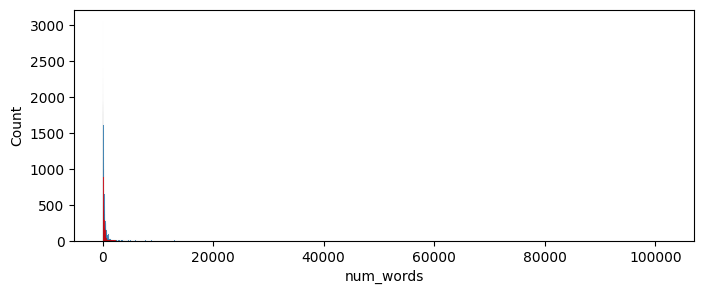

In [25]:
plt.figure(figsize=(8,3))
sns.histplot(df[df['label'] == 0]['num_words'])
sns.histplot(df[df['label'] == 1]['num_words'],color='red')

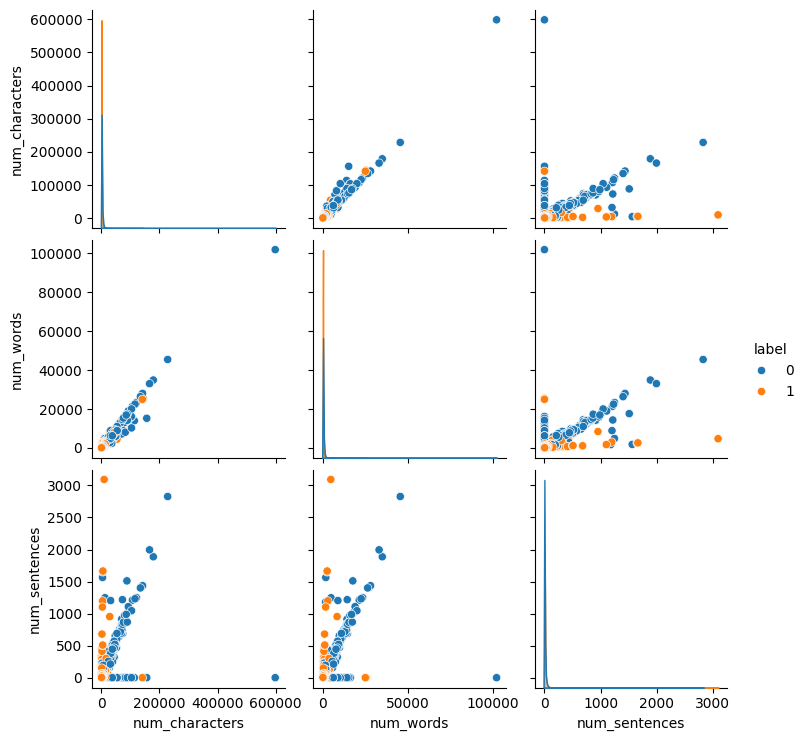

In [27]:
sns.pairplot(df,hue='label')

In [29]:
# Split the data into features (X) and target (y)
X = df['text']
y = df['label']

In [30]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [31]:
# Create a TF-IDF vectorizer to convert text data into numerical features
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [32]:
# Train the models
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_tfidf, y_train)


KNeighborsClassifier()

In [33]:
logistic = LogisticRegression()
logistic.fit(X_train_tfidf, y_train)


LogisticRegression()

In [34]:
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_tfidf, y_train)

MultinomialNB()

In [35]:
# Save the trained models to pickle files
with open('knn_model.pkl', 'wb') as f:
    pickle.dump(knn, f)

with open('logistic_model.pkl', 'wb') as f:
    pickle.dump(logistic, f)

with open('naive_bayes_model.pkl', 'wb') as f:
    pickle.dump(naive_bayes, f)

In [43]:
# Load the saved models
with open('knn_model.pkl', 'rb') as f:
    knn = pickle.load(f)

with open('logistic_model.pkl', 'rb') as f:
    logistic = pickle.load(f)

with open('naive_bayes_model.pkl', 'rb') as f:
    naive_bayes = pickle.load(f)


In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [37]:
# Make predictions on the test set
knn_pred = knn.predict(X_test_tfidf)
logistic_pred = logistic.predict(X_test_tfidf)
naive_bayes_pred = naive_bayes.predict(X_test_tfidf)


In [38]:
# Calculate accuracy
knn_accuracy = accuracy_score(y_test, knn_pred)
logistic_accuracy = accuracy_score(y_test, logistic_pred)
naive_bayes_accuracy = accuracy_score(y_test, naive_bayes_pred)

In [45]:
print("KNN Accuracy:", knn_accuracy)
print("Logistic Accuracy:", logistic_accuracy)
print("Naive Bayes Accuracy:", naive_bayes_accuracy)


KNN Accuracy: 0.7897343718793689
Logistic Accuracy: 0.9840223686838426
Naive Bayes Accuracy: 0.975234671459956


In [47]:
# Take input from the user
user_input = input("Enter an email: ")

# Convert the user input to TF-IDF features
user_input_tfidf = vectorizer.transform([user_input])

# Make predictions
knn_pred = knn.predict(user_input_tfidf)
logistic_pred = logistic.predict(user_input_tfidf)
naive_bayes_pred = naive_bayes.predict(user_input_tfidf)

# Print the results
print("KNN Prediction:", "Spam" if knn_pred[0] == 1 else "Not Spam")
print("Logistic Prediction:", "Spam" if logistic_pred[0] == 1 else "Not Spam")
print("Naive Bayes Prediction:", "Spam" if naive_bayes_pred[0] == 1 else "Not Spam")

KNN Prediction: Not Spam
Logistic Prediction: Not Spam
Naive Bayes Prediction: Not Spam
